In [1]:
import numpy as np

In [2]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

## Convolution

Convolutional layer define a kernel (weight matrix) which is then multiplied element by element with a section of the input of the same size. Sum all the resulting values. Move the kernel a number of pixels equal to a defined stride size and repeat until you go throught the whole image. Afterwards apply an activation function to each one of the values. Now repeat all of this for each filter in your layer.

![Convolution](https://raw.githubusercontent.com/UCIDataScienceInitiative/LearningWithPython/master/images/conv_layer.gif)

In [3]:
def convolution(input_image, conv_filter, stride):
    """
    Perform convolution on input_image with conv_filter and return feature_map.
    
    Args
        input_image: (d x d) numpy array
        conv_filter: (s x s) square numpy array
        stride: sliding width / height
    """
    d = input_image.shape[0]
    s = conv_filter.shape[0]
    n = (d - s) / stride
    feature_map = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            feature_map[i, j] = 0
    return feature_map

Convolution detects features in the image that match the filter, e.g. horizontal edges.

In [4]:
input_image = np.zeros((20, 20))
input_image[9:11, :] = 1

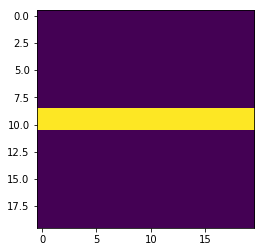

In [5]:
plt.imshow(input_image)
plt.show()

In [6]:
conv_filter = np.zeros((4, 4))
conv_filter[1:3, :] = 1

In [7]:
print(conv_filter)

[[ 0.  0.  0.  0.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 0.  0.  0.  0.]]


In [8]:
output = convolution(input_image, conv_filter, 1)

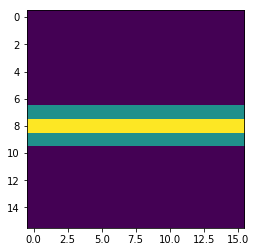

In [9]:
plt.imshow(output)
plt.show()

More complex features such as a cross can be detected with a combination of different filters.

In [10]:
input_image = np.zeros((20, 20))
input_image[9:11, :] = 1
input_image[:, 9:11] = 1

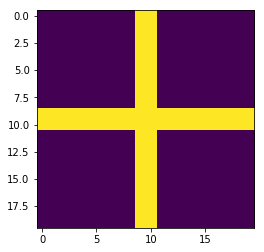

In [11]:
plt.imshow(input_image)
plt.show()

In [12]:
conv_filter1 = np.zeros((4, 4))
conv_filter1[1:3, :] = 1
conv_filter2 = np.zeros((4, 4))
conv_filter2[:, 1:3] = 1

In [13]:
print(conv_filter1)

[[ 0.  0.  0.  0.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 0.  0.  0.  0.]]


In [14]:
print(conv_filter2)

[[ 0.  1.  1.  0.]
 [ 0.  1.  1.  0.]
 [ 0.  1.  1.  0.]
 [ 0.  1.  1.  0.]]


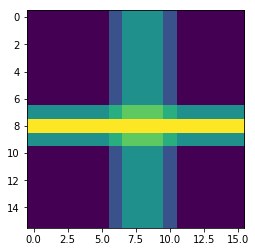

In [15]:
output1 = convolution(input_image, conv_filter1, 1)
plt.imshow(output1)
plt.show()

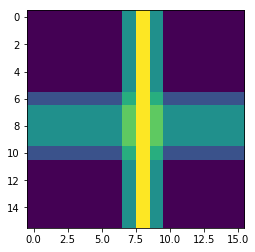

In [16]:
output2 = convolution(input_image, conv_filter2, 1)
plt.imshow(output2)
plt.show()

As images have multiple channels, convolution is actually three dimensional.

![Filter](https://raw.githubusercontent.com/UCIDataScienceInitiative/LearningWithPython/master/images/cnn.jpeg)

Convolution is translation invariant, which means the same features can de detected regardless of their locations.

In [33]:
input_image = np.zeros((50, 50))
for i in range(5):
    x = int(np.random.uniform(5, 45, 1))
    y = int(np.random.uniform(5, 45, 1))
    input_image[x, y] = 1
    input_image[(x - 2):(x + 3), y] = 1
    input_image[x, (y - 2):(y + 3)] = 1

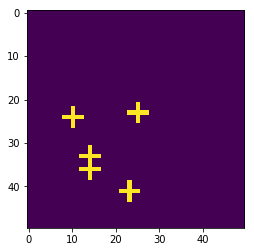

In [34]:
plt.imshow(input_image)
plt.show()

In [35]:
conv_filter = np.zeros((5, 5))
conv_filter[2, :] = 1
conv_filter[:, 2] = 1

In [36]:
print(conv_filter)

[[ 0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 1.  1.  1.  1.  1.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.]]


In [37]:
output = convolution(input_image, conv_filter, 1)

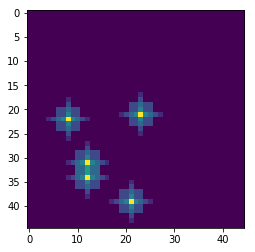

In [38]:
plt.imshow(output)
plt.show()

Large convolution filters have substantially more parameters and are more difficult to learn. Therefore, to learn features at different scales, we would downsample the images instead.

![Maxpool](https://raw.githubusercontent.com/UCIDataScienceInitiative/LearningWithPython/master/images/maxpool.jpeg)

In [39]:
def pooling(feature_map, size, stride):
    """
    Perform max pooling on feature_map.
    
    Args
        feature_map: (d x d) numpy array
        size: pooling window size
        stride: sliding width / height
    """
    d = feature_map.shape[0]
    n = (d - size) / stride
    reduced_map = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            reduced_map[i, j] = 0
    return reduced_map

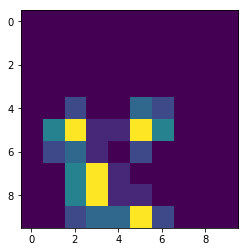

In [40]:
plt.imshow(pooling(output, 4, 4))
plt.show()

## Hierarchical representation

https://distill.pub/2017/feature-visualization/

![Filter](https://raw.githubusercontent.com/UCIDataScienceInitiative/LearningWithPython/master/figures/filter.png)

In [340]:
import keras.datasets.mnist as mnist

In [341]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 7s 1us/step


In [354]:
# This makes sure the image has the correct order in the axis for Tensorflow, it would be different for Theano backend
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Convert values to floats, originally they are integers
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Convert values of labels from 0 to 9 to categorical (one_hot encoding)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [344]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D

Keras documentation: https://keras.io/layers/convolutional/

In [357]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))

In [358]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [359]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 6272)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                62730     
Total params: 63,050
Trainable params: 63,050
Non-trainable params: 0
_________________________________________________________________


Common pre-processing steps include rotation and zoom, which will make the neural network learn features that are angle and scale invariant. These steps can be performed within a data generator on-the-fly.

In [360]:
from keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(rescale=1./255,
                                    #featurewise_center=True,
                                    #featurewise_std_normalization=True,
                                    rotation_range=10,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    #horizontal_flip=True,
                                    zoom_range=0.1
                                    )

In [361]:
model.fit_generator(data_generator.flow(x_train[0:40000], y_train[0:40000], batch_size=100), steps_per_epoch=40000/100,
                    validation_data=(x_train[40000:], y_train[40000:]), 
                    epochs=10, verbose=2)

Epoch 1/10
 - 26s - loss: 0.8140 - acc: 0.7562 - val_loss: 5.2912 - val_acc: 0.6683
Epoch 2/10
 - 25s - loss: 0.3456 - acc: 0.9010 - val_loss: 6.3462 - val_acc: 0.6038
Epoch 3/10
 - 25s - loss: 0.2771 - acc: 0.9173 - val_loss: 5.8151 - val_acc: 0.6369
Epoch 4/10
 - 29s - loss: 0.2475 - acc: 0.9269 - val_loss: 6.2446 - val_acc: 0.6103
Epoch 5/10
 - 23s - loss: 0.2387 - acc: 0.9291 - val_loss: 6.2826 - val_acc: 0.6079
Epoch 6/10
 - 24s - loss: 0.2260 - acc: 0.9309 - val_loss: 5.8294 - val_acc: 0.6362
Epoch 7/10
 - 24s - loss: 0.2183 - acc: 0.9341 - val_loss: 6.2320 - val_acc: 0.6112
Epoch 8/10
 - 24s - loss: 0.2077 - acc: 0.9376 - val_loss: 6.1975 - val_acc: 0.6131
Epoch 9/10
 - 25s - loss: 0.2009 - acc: 0.9392 - val_loss: 6.2829 - val_acc: 0.6071
Epoch 10/10
 - 28s - loss: 0.1958 - acc: 0.9424 - val_loss: 7.7532 - val_acc: 0.5164


## Further readings

https://qz.com/1034972/the-data-that-changed-the-direction-of-ai-research-and-possibly-the-world/

https://www.youtube.com/watch?v=KfV8CJh7hE0&list=PLkDaE6sCZn6Gl29AoE31iwdVwSG-KnDzF&index=18

https://blog.openai.com/adversarial-example-research/

![Adverserial](https://blog.openai.com/content/images/2017/02/adversarial_img_1.png)